Import STDLIB

In [1]:
import numpy as np # for computation
import matplotlib.pyplot as plt # for plotting (line below keeps plots within notebook)
import matplotlib.ticker # to modify tick marks
%matplotlib inline
from __future__ import division
from astropy.io import ascii # for reading in CSV
from PIL import Image # for manipulating jpgs, pngs, etc.
import os # for directories, etc. 

Read in and Format Data

In [2]:
data_file = ascii.read('./Figure_Data.csv')

In [3]:
data_file

Object,Radius (km),Average Distance from Earth (km),Stellar Parallax (arcsec)
str20,float64,float64,float64
ISS,0.11,350.0,--
Moon,1737.1,384400.0,--
Mercury,2440.0,91691000.0,--
Venus,6052.0,41400000.0,--
Mars,3390.0,78340000.0,--
Jupiter,69911.0,628730000.0,--
Saturn,58232.0,1275000000.0,--
Uranus,25362.0,2723950000.0,--
Neptune,24622.0,4351400000.0,--


In [108]:
data_file = ascii.read('./Figure_Data.csv')
#print data_file.colnames

def find_angular_size(size, distance, angle='rad'):
    if angle == 'rad':
        return size / distance
    elif angle == 'arcsec':
        return 2.06265e5 * size / distance 

objects = data_file['Object']
 
size = data_file['Radius (km)']
distance = data_file['Average Distance from Earth (km)']

print find_angular_size(size[objects=='Sirius'], distance[objects=='Sirius'], angle='arcsec')

#for i in range(len(data_file)):
#print data_file['Object'], find_angular_size(size, distance,angle='arcsec') # just checking
    
#print 'Pictures gathered so far:', os.listdir('./astro_scale/'), '\n'
#print 'Objects in CSV:', [i for i in objects]

objects_to_plot = {
    'exoplanet size':[find_angular_size(size[objects=='exoplanet'], distance[objects=='exoplanet'], angle='arcsec')[0],\
                 './astro_scale/exoplanet.jpg', distance[objects=='exoplanet']],
    'exoplanet orbit':[0.25,\
                 './astro_scale/exoplanet.jpg', distance[objects=='exoplanet']],
    'MW BH disk':[find_angular_size(size[objects=='Sag_A_accretion_disk'], distance[objects=='Sag_A_accretion_disk'], angle='arcsec')[0],\
                      './astro_scale/SigA%2a_BlackHoles.jpg',  distance[objects=='Sag_A_accretion_disk']],
    'quasar':[find_angular_size(size[objects=='quasar'], distance[objects=='quasar'], angle='arcsec')[0],\
              './astro_scale/Quasar_1127_xray.jpg', distance[objects=='quasar']],
    'Betelgeuse':[find_angular_size(size[objects=='Betelgeuse'], distance[objects=='Betelgeuse'], angle='arcsec')[0],\
                  './astro_scale/betelgeuse.jpg', distance[objects=='Betelgeuse']],
    'Sirius Radius':[find_angular_size(size[objects=='SiriusRadius'], distance[objects=='SiriusRadius'], angle='arcsec')[0],\
              './astro_scale/sirius_600.jpg', distance[objects=='SiriusRadius']],
    'Vesta':[find_angular_size(size[objects=='Vesta'], distance[objects=='Vesta'], angle='arcsec')[0],\
             './astro_scale/asteroid_large.jpg',  distance[objects=='Vesta']],
    'Mercury':[find_angular_size(size[objects=='Mercury'], distance[objects=='Mercury'], angle='arcsec')[0],\
               './astro_scale/Mercury_in_color.png', distance[objects=='Mercury']],
    'Moon':[find_angular_size(size[objects=='Moon'], distance[objects=='Moon'], angle='arcsec')[0],\
            './astro_scale/FullMoon2010.jpg', distance[objects=='Moon']],
    'Sun':[find_angular_size(size[objects=='Sun'], distance[objects=='Sun'], angle='arcsec')[0],\
            './astro_scale/Sun.jpg', distance[objects=='Sun']],
    'M31':[find_angular_size(size[objects=='Andromeda'], distance[objects=='Andromeda'], angle='arcsec')[0],\
                 './astro_scale/m31withandwithoutstars.jpg', distance[objects=='Andromeda']],
    'Jupiter':[find_angular_size(size[objects=='Jupiter'], distance[objects=='Jupiter'], angle='arcsec')[0],\
               './astro_scale/Jupiter_main_PIA14410_full.png', distance[objects=='Jupiter']],
    'M104':[find_angular_size(size[objects=='M104'], distance[objects=='M104'], angle='arcsec')[0],\
            './astro_scale/m104.png', distance[objects=='M104']],
    'SMC':[find_angular_size(size[objects=='SMC'], distance[objects=='SMC'], angle='arcsec')[0],\
            '.', distance[objects=='SMC']],
    'LAE at z~1':[2*find_angular_size(size[objects=='LAE'], distance[objects=='LAE'], angle='arcsec')[0],\
            '.', 0.3*distance[objects=='LAE']],
    'NGC151':[find_angular_size(size[objects=='NGC151'], distance[objects=='NGC151'], angle='arcsec')[0],\
            '.', distance[objects=='NGC151']],
    'NGC1365':[find_angular_size(size[objects=='NGC1365'], distance[objects=='NGC1365'], angle='arcsec')[0],\
            '.', distance[objects=='NGC1365']],
    'M33':[find_angular_size(size[objects=='M33'], distance[objects=='M33'], angle='arcsec')[0],\
            '.', distance[objects=='M33']],
    'Galaxy at z~10':[10*find_angular_size(size[objects=='MACS0647-JD'], distance[objects=='MACS0647-JD'], angle='arcsec')[0],\
            '.', 0.3*distance[objects=='MACS0647-JD']],
    'Alpha Centauri':[find_angular_size(size[objects=='Alpha Centauri'], distance[objects=='Alpha Centauri'], angle='arcsec')[0],\
            '~', distance[objects=='Alpha Centauri']],
    'Sirius':[find_angular_size(size[objects=='Sirius'], distance[objects=='Sirius'], angle='arcsec')[0],\
            '~', distance[objects=='Sirius']],
    'Deneb':[find_angular_size(size[objects=='Deneb'], distance[objects=='Deneb'], angle='arcsec')[0],\
            '~', distance[objects=='Deneb']],
    'ULAS J0744+25':[find_angular_size(size[objects=='ULAS J0744+25'], distance[objects=='ULAS J0744+25'], angle='arcsec')[0],\
            '~~', distance[objects=='ULAS J0744+25']],
    'Polaris':[find_angular_size(size[objects=='Polaris'], distance[objects=='Polaris'], angle='arcsec')[0],\
            '~', distance[objects=='Polaris']]
}

keys = ['exoplanet orbit', 'MW BH disk', 'quasar',\
        'Vesta', 'Mercury', 'Jupiter', 'M104', 'Moon', 'M31','Sun',\
        'LAE at z~1','Galaxy at z~10']
      #'Alpha Centauri', 'Deneb', Sirius Radius']

Radius (km)
-----------
        0.0


Angular Resolution Plot

In [5]:
data_file

Object,Radius (km),Average Distance from Earth (km),Stellar Parallax (arcsec)
str20,float64,float64,float64
ISS,0.11,350.0,--
Moon,1737.1,384400.0,--
Mercury,2440.0,91691000.0,--
Venus,6052.0,41400000.0,--
Mars,3390.0,78340000.0,--
Jupiter,69911.0,628730000.0,--
Saturn,58232.0,1275000000.0,--
Uranus,25362.0,2723950000.0,--
Neptune,24622.0,4351400000.0,--


In [6]:
#def year2tick(year, maxy=2020):
#    return maxy*((np.array(year)-1600.0)/(maxy-1600.0))**18

def km_to_pc(x):
    return x / 3e13

def pc_to_km(x):
    return x * 3e13

def arcsec_to_rad(x):
    return x / 206265

def rad_to_arcsec(x):
    return x * 206265

exoplanet orbit
exoplanet orbit 500.0
0.639085652362 2.69897000434
MW BH disk
MW BH disk 8000.0
0.691438695087 3.90308998699
quasar
quasar 500000000.0
0.89995521758 8.69897000434
Vesta
Vesta 5e-06
0.291259565406 -5.30102999566
Mercury
Mercury 3.05636666667e-06
0.281965454545 -5.51479454546
Jupiter
Jupiter 2.09576666667e-05
0.318319257765 -4.67865707141
M104
M104 9000000.0
0.82409750041 6.95424250944
Moon
Moon 1.28133333333e-08
0.178594005403 -7.89233787572
M31
M31 1000000.0
0.782608695652 6.0
Sun
Sun 5e-06
0.291259565406 -5.30102999566
LAE at z~1
LAE at z~1 1000000000.0
0.913043478261 9.0
Galaxy at z~10
Galaxy at z~10 3000000000.0
0.93378788064 9.47712125472


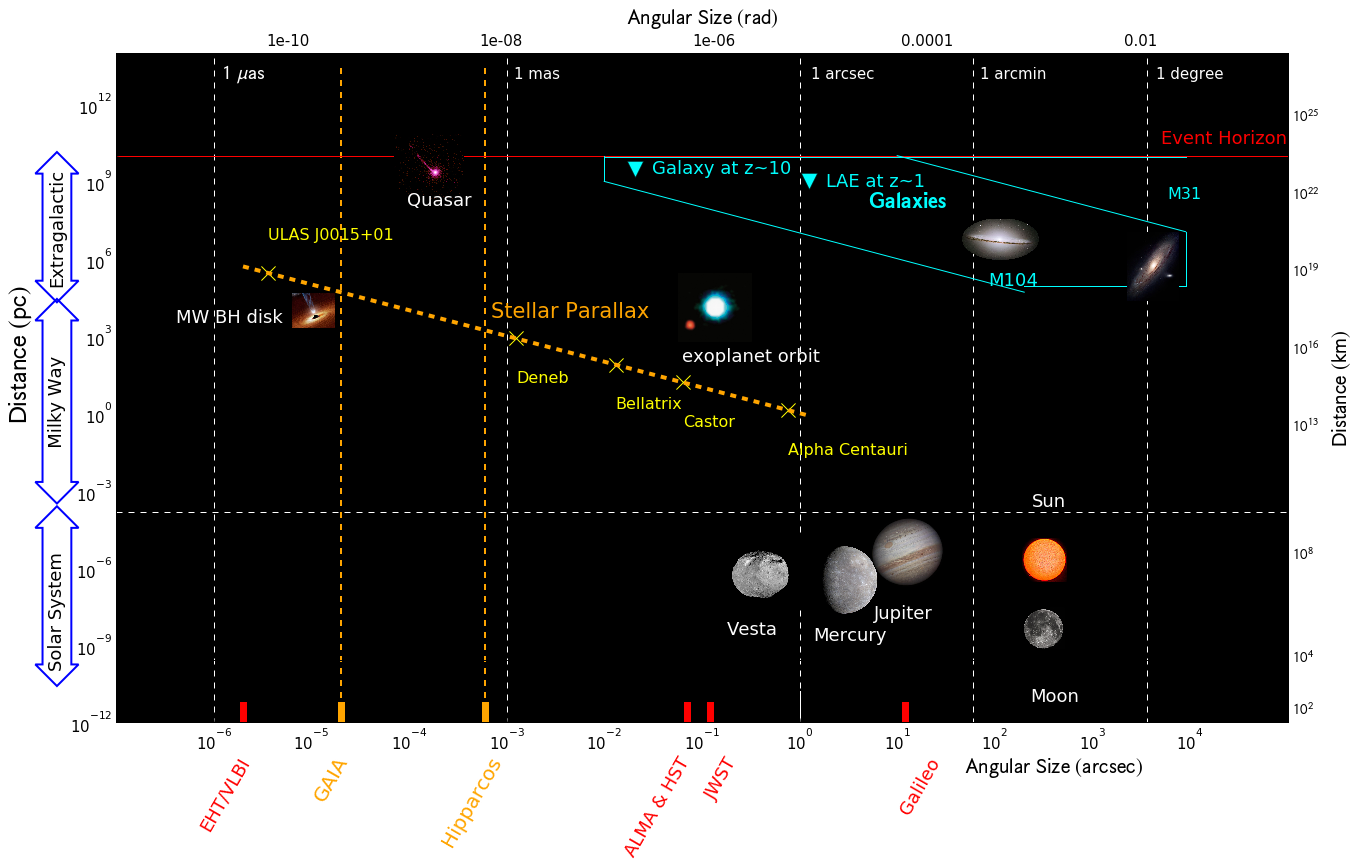

In [133]:
lbl_ft_sz = 18 # label font size
plot_lbl_ft_sz = 12

from matplotlib import rc # needed to modify TeX font; I don't like serif fonts too much
params = {'text.usetex': False, 'mathtext.fontset': 'stixsans'}
plt.rcParams.update(params)

fig = plt.figure(figsize=(21,12)) # create figure and set size - W, H, in inches
ax = plt.subplot(111) # add an axis object

ax.set_axis_bgcolor('black') # set background color to black
ax.set_xscale('log') # make x-axis log scale

ax.set_xlim(5e-7, 5e4) # set x-axis limits
ax.xaxis.set_label_coords(0.8, -0.05) 
ax.set_xticks([10 ** i for i in range(-6, 5)])


ax.set_xlabel(r'$\rm{Angular \ Size} \ (\rm{arcsec})$', size=lbl_ft_sz + 3) # label x-axis
ax.xaxis.labelpad = 10
ax.set_ylabel(r'$\rm{Distance \ (pc)}$', size=lbl_ft_sz + 8)
ax.yaxis.labelpad = 10

ax.yaxis.set_label_coords(-0.07, 0.55) 
ax.set_yscale('log')
yticks=[1e-12, 1e-9, 1e-6, 1e-3, 1, 1000, 1e6, 1e9, 1e12]

ax.set_yticks(yticks)
ax.set_ylim(1e-12, 1e14)

# setting up additional axes for km distance scale and radians
ax2 = ax.twinx()
ax3 = ax.twiny()

ax2.set_ylabel(r'$\rm{Distance \ (km)}$', size=lbl_ft_sz + 3)
ax2.yaxis.labelpad = 10
ax2.set_yscale('log')
ax2.set_ylim(1e-12*3e13, 1e14*3e13) # same limits as other y-axis

km_dist = [1e2, 1e4, 1e8, 1e13, 1e16, 1e19, 1e22, 1e25]
km_ticks = ['$10^2$','$10^4$','$10^8$','$10^{13}$','$10^{16}$','$10^{19}$','$10^{22}$','$10^{25}$']
ax2.set_yticks(km_dist)
ax2.set_yticklabels(km_ticks)
ax3.set_xlabel(r'$\rm{Angular \ Size} \ (\rm{rad})$', size=lbl_ft_sz + 3)
ax3.xaxis.labelpad = 10
ax3.set_xlim(5e-7, 5e4)
ax3.set_xscale('log')
rad_ticks = [10**j for j in range(-10, 0, 2)]
ax3.set_xticks([rad_to_arcsec(r) for r in rad_ticks])
ax3.set_xticklabels(rad_ticks)


ax.plot([1, 1], [0, km_to_pc(5e2)], color='white')
#ax.text(1, km_to_pc(5e2), 'HST', color='white')

plt.setp(ax.get_xticklabels(), fontsize=15) # make x-axis tick marks larger
plt.setp(ax.get_yticklabels(), fontsize=15)
plt.setp(ax2.get_yticklabels(), fontsize=15)
plt.setp(ax3.get_xticklabels(), fontsize=15)
#plt.setp(ax, yticks=[]) # remove y-axis tick marks

yrange = [0,2e15]
#xrange_plot = [5e-7, 5e4]
yoffset = 0.99 * 1e13

ax.plot([1, 1], yrange, color='white', linestyle='--')
ax.text(1.3, yoffset, '1 arcsec', color='white', size=lbl_ft_sz - 3)
#ax.text(1.3, 0.85, 'Fried Length', color='white', size=lbl_ft_sz - 4)

ax.plot([60, 60], yrange, color='white', linestyle='--')
ax.text(70, yoffset, '1 arcmin', color='white', size=lbl_ft_sz - 3)

ax.plot([3600, 3600], yrange, color='white', linestyle='--')
ax.text(4500, yoffset, '1 degree', color='white', size=lbl_ft_sz - 3)

ax.plot([0.001, 0.001], yrange, color='white', linestyle='--')
ax.text(0.0012, yoffset-1300, '1 mas', color='white', size=lbl_ft_sz - 3)

ax.plot([1e-6, 1e-6], yrange, color='white', linestyle='--')
ax.text(1.2e-6, yoffset-1300, r'$1 \ \mu \rm{as}$', color='white', size=lbl_ft_sz+2)


for i in range(len(keys)):
    print keys[i]
    obj = objects_to_plot[keys[i]]
    y= km_to_pc(float(obj[2]))
    print keys[i],y
     
    x = 0.065 * (np.log10(obj[0]) + 6) + 0.13
 
    
    if keys[i] == 'M31':
        
        sp = plt.axes([x, (np.log10(y)+12)/26.0-0.08, 0.08, 0.08])
    elif keys[i] == 'M104':
        
        sp = plt.axes([x, (np.log10(y)+12)/26.0-0.07, 0.05, 0.05])
    elif keys[i] == 'Moon':
        sp = plt.axes([x, (np.log10(y)+12)/26.0+0.05, 0.05, 0.05])
    elif keys[i] == 'Sun':
        sp = plt.axes([x, (np.log10(y)+12)/26.0+0.03, 0.05, 0.05])
    elif keys[i] == 'MW BH disk':
        
        sp = plt.axes([x, (np.log10(y)+12)/26.0-0.03, 0.04, 0.04])
    elif keys[i] == 'quasar':
        sp = plt.axes([x, (np.log10(y)+12)/26.0-0.07, 0.08, 0.08])
    else:
        sp = plt.axes([x, (np.log10(y)+12)/26.0, 0.08, 0.08]) # create a separate axes object within the main plot
    print (np.log10(y)+12)/23.0, np.log10(y)
    sp.axis('off') # remove the frame of the axes object
    if obj[1]=='.':
        ax.plot([float(obj[0]),float(obj[0])],[y,y], 'v',color='cyan',markersize=16)
        ax.text(float(obj[0])*1.5, y/1.5, keys[i], color='cyan', size=lbl_ft_sz)
        continue
    if obj[1]=='~':
        print obj[0], 'arcsec',1.0/y,y
        ax.plot([float(1.0/y),float(1.0/y)],[y,y], 'o',color='yellow',markersize=16)
        continue
    data = Image.open(obj[1]) # open image
    data = np.asarray(data) # convert to numpy array
    if keys[i] == 'M31':
        sp.text(300, -250, 'M31', color='cyan', size=plot_lbl_ft_sz+4)
        plt.imshow(data, interpolation='nearest')
        plt.setp(sp, yticks=[], xticks=[]) 
        continue
     
    elif keys[i] == 'MW BH disk':
        ax.text(float(obj[0])/100.0, y/2.5, keys[i], color='white', size=lbl_ft_sz)
        plt.imshow(data, interpolation='nearest')
        plt.setp(sp, yticks=[], xticks=[]) 
        continue
    elif keys[i] == 'exoplanet orbit':
        ax.text(float(obj[0])/4.0, y/5.0, keys[i], color='white', size=lbl_ft_sz)
        plt.imshow(data, interpolation='nearest')
        plt.setp(sp, yticks=[], xticks=[]) 
        continue
        
    elif keys[i] == 'quasar':
        sp.text(100, 550, 'Quasar', color='white', size=plot_lbl_ft_sz+6)
        plt.imshow(data, interpolation='nearest')
        plt.setp(sp, yticks=[], xticks=[]) 
        continue
    elif keys[i] == 'Moon':
        ax.text(float(obj[0])/4.0, y/2000.0, keys[i], color='white', size=lbl_ft_sz)
        plt.imshow(data, interpolation='nearest')
        plt.setp(sp, yticks=[], xticks=[]) 
        continue
    elif keys[i] == 'Sun':
        ax.text(float(obj[0])/4.0, y*50.0, keys[i], color='white', size=lbl_ft_sz)
        plt.imshow(data, interpolation='nearest')
        plt.setp(sp, yticks=[], xticks=[]) 
        continue
    elif keys[i] == 'M104':
        ax.text(float(obj[0])/4.0, y/100.0, keys[i], color='cyan', size=lbl_ft_sz)
        plt.imshow(data, interpolation='nearest')
        plt.setp(sp, yticks=[], xticks=[]) 
        continue
    plt.imshow(data, interpolation='nearest') # plot 2D data with imshow
    plt.setp(sp, yticks=[], xticks=[]) # remove tick marks
    ax.text(float(obj[0])/4.0, y/2000.0, keys[i], color='white', size=lbl_ft_sz)

ax.plot(np.linspace(2e-6, 1.25, 50), 1.0/np.linspace(2e-6, 1.25, 50), '--',color='orange', lw=4 )
ax.text(7e-4, 4.0/8e-4, 'Stellar Parallax', color='orange', size=lbl_ft_sz+3)

ax.plot(np.zeros(5)+2e-5, np.linspace(1e-12, 3e13,5),'--', color='orange', lw=2)
ax.plot(np.zeros(5)+6e-4, np.linspace(1e-12, 3e13,5),'--', color='orange', lw=2)

star_para=np.array([0.768855048,3.62E-06,0.001246787,\
0.063952157,0.01304624])
ax.scatter(star_para,1.0/star_para, marker='x',c='yellow',s=200)
ax.text(star_para[0],0.02/star_para[0], 'Alpha Centauri',color='yellow', size=lbl_ft_sz-2 )
ax.text(star_para[1],20/star_para[1], 'ULAS J0015+01',color='yellow', size=lbl_ft_sz-2 )
ax.text(star_para[2],0.02/star_para[2], 'Deneb',color='yellow', size=lbl_ft_sz-2 )
ax.text(star_para[3],0.02/star_para[3], 'Castor',color='yellow', size=lbl_ft_sz-2 )
ax.text(star_para[4],0.02/star_para[4], 'Bellatrix',color='yellow', size=lbl_ft_sz-2 )
 

#ax.plot([1e-7, 1e+5],[6e4,6e4],'w-')
ax.plot([1e-7, 1e+5],[1e10,1e10],'r-')
ax.plot([1e-7, 1e+5],[1.5e-4,1.5e-4],'w--')
#ax.text(0.5e4, 9e-4, 'Solar System', color='r',size=lbl_ft_sz)
#ax.text(0.5e4, 6e3, 'MW Border', color='r',size=lbl_ft_sz)
ax.text(0.5e4, 3e10, 'Event Horizon', color='r',size=lbl_ft_sz)


bbox_props = dict(boxstyle="darrow,pad=0.3", fc="none", ec="b", lw=2)

plt.figtext(0.08,0.75,'Extragalactic', color='k', size=lbl_ft_sz, rotation='90',bbox=bbox_props)
plt.figtext(0.08,0.58,'       Milky Way       ', color='k',\
            size=lbl_ft_sz, rotation='90', bbox=bbox_props)
plt.figtext(0.08,0.34,'Solar System     ', color='k',\
            size=lbl_ft_sz, rotation='90', bbox=bbox_props)
ax2.plot([1e-7, 1e+5],[7500,7500],'k-')

ax.plot(np.linspace(1e-2, 2e2, 6),1e7/np.linspace(1e-2, 2e2, 6), '-',color='cyan')
ax.plot([1e-2, 9e3],[0.9e10, 0.9e10], '-',color='cyan')
ax.plot(np.linspace(10, 9e3, 6),1e11/np.linspace(10, 9e3, 6), '-',color='cyan')
ax.plot(np.zeros(5)+1e-2 , np.linspace(1e9, 1e10, 5), '-',color='cyan')
ax.plot(np.zeros(5)+9e3 , np.linspace(9e4, 1e11/9e3, 5), '-',color='cyan')
ax.plot([2e2, 9e3] , [9e4,9e4], '-',color='cyan')


ax.text(5,1e8, '$\mathbf{Galaxies}$', color='cyan', size=lbl_ft_sz+4)

ax2.text(5*2.0, 0.5, 'Galileo', color='red', size=lbl_ft_sz, rotation='60')
#ax2.text(0.07, 0.5, 'HST', color='red', size=lbl_ft_sz, rotation='60' )
ax2.text(2e-6/3.0, 0.5, 'EHT/VLBI', color='red', size=lbl_ft_sz, rotation='60' )
ax2.text(0.03/2, 0.5, 'ALMA & HST', color='red', size=lbl_ft_sz, rotation='60' )
#ax2.text(1.2, 0.5, 'ESO 3.6m', color='red', size=lbl_ft_sz )
ax2.text(0.10, 0.5, 'JWST', color='red', size=lbl_ft_sz, rotation='60' )
ax2.text(2e-5/2.0, 0.5, 'GAIA', color='orange', size=lbl_ft_sz+2, rotation='60' )
ax2.text(6e-4/3.0, 0.5, 'Hipparcos', color='orange', size=lbl_ft_sz+2, rotation='60' )

ax.plot([12,12],[1e-12, 4.5e-12], color='red', lw=7)
ax.plot([2e-6,2e-6],[1e-12, 4.5e-12], color='red', lw=7)
ax.plot([0.07,0.07],[1e-12, 4.5e-12], color='red', lw=7)
ax.plot([0.12,0.12],[1e-12, 4.5e-12], color='red', lw=7)
ax.plot([2e-5,2e-5],[1e-12, 4.5e-12], color='orange', lw=7)
ax.plot([6e-4,6e-4],[1e-12, 4.5e-12], color='orange', lw=7)

plt.savefig('sotzen_wang_delavega_171_618_plot4.jpg', format='jpg', dpi=120, bbox_inches='tight')

plt.show() # show plot